<a href="https://colab.research.google.com/github/tohsin/Covid19_prediction_from_xray_scans/blob/main/Covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp /content/drive/MyDrive/covid_cxr/csc532.zip /content 

In [ ]:
!unzip /content/csc532.zip

Archive:  /content/csc532.zip
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (10).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (100).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (101).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (102).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (103).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (104).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (105).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (106).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (107).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (108).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (109).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (11).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (110).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (111).jpg  

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
from tensorflow import keras
import os
import shutil
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model
from keras import models
from keras import layers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import math

In [ ]:
original_dataset_dir_negative = '/content/datasets/datasets/train/negative'
original_dataset_dir_positive = '/content/datasets/datasets/train/positive'
base_dir = '/content/Data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [ ]:
train_negative_dir = os.path.join(train_dir, 'negative')
train_positive_dir = os.path.join(train_dir, 'positive')
#####################################################
validation_negative_dir = os.path.join(validation_dir, 'negative')
validation_positive_dir = os.path.join(validation_dir, 'positive')
######################################################
test_negative_dir = os.path.join(test_dir, 'negative')
test_positive_dir = os.path.join(test_dir, 'positive')

In [ ]:

os.mkdir(train_negative_dir)
os.mkdir(train_positive_dir)
######################################
os.mkdir(validation_negative_dir)
os.mkdir(validation_positive_dir)
########################################
os.mkdir(test_negative_dir)
os.mkdir(test_positive_dir)

In [ ]:
positive_image = os.listdir("/content/datasets/datasets/train/positive")
negative_image = os.listdir("/content/datasets/datasets/train/negative")
print(len(negative_image))
print(len(positive_image))

551
125


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

for i in range(501):

  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(train_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

for i in range(501,531):

  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(validation_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

for i in range(531,551):
  
  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(test_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

print(i)

550


In [ ]:
for i in range(100):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(train_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with train")

for i in range(100,113):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(validation_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with validation")

for i in range(113,125):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(test_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with test")



done with train
done with validation
done with test


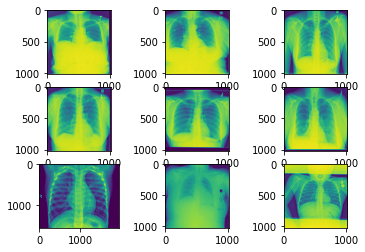

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	src = os.path.join(original_dataset_dir_negative,negative_image[i] )
	# load image pixels
	image = imread(src)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary')


Found 601 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary')

Found 43 images belonging to 2 classes.


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
train_class_weights = dict(enumerate(class_weights))

In [ ]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=30,
#       class_weight=class_weights
#       validation_data=validation_generator,
#       validation_steps=50) 

In [ ]:
from tensorflow.keras.applications import ResNet50
INPUT_SHAPE = (224, 224, 3)
res_net=ResNet50( include_top=False,weights="imagenet",
    input_shape=INPUT_SHAPE ,
    pooling=max)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in res_net.layers:
    layer.trainable = False

In [ ]:
res_net.summary()

In [ ]:

model =  tf.keras.models.Sequential()
model.add(res_net)
model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

epochs=50
lr=2e-5

opt = tf.keras.optimizers.Adam(learning_rate = lr)

checkpoint_filepath =  '/content/drive/MyDrive/models/model_1.h5'
model_checkpoint_callback_ = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq="epoch",
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=False)
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(601)

history =model.fit(train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=epochs,
      validation_data=validation_generator,
      )

In [ ]:
model.save('/content/drive/MyDrive/models/model_frozen_test')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_frozen_test/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_frozen_test/assets


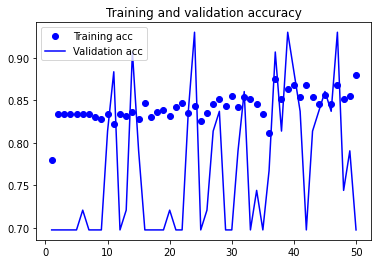

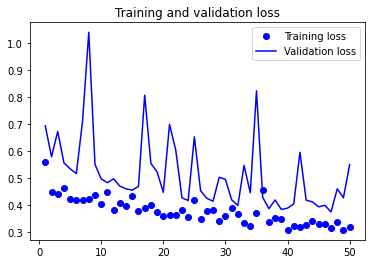

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=1
)

Found 32 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 1s 28ms/step - loss: 0.5735 - acc: 0.6250


[0.5735048055648804, 0.625]

In [ ]:
res_net.summary()

In [ ]:
res_net.trainable = True

set_trainable = False
for layer in res_net.layers:
  if layer.name == 'conv5_block2_3_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 100352)            0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 512)               51380736  
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 1)                 513       
Total params: 74,968,961
Trainable params: 56,901,633
Non-trainable params: 18,067,328
_________________________________________________________________


In [ ]:
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(601)
lr=1e-5
opt = tf.keras.optimizers.Adam(learning_rate = lr)
checkpoint_filepath =  '/content/drive/MyDrive/models/model_frozen_top_test.h5'
model_checkpoint_callback_ = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq="epoch",
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=False)
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['acc'])

history =model.fit(train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=30,
      validation_data=validation_generator,
      )

In [ ]:
model.save('/content/drive/MyDrive/models/model_frozen_test')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_frozen_test/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_frozen_test/assets


In [ ]:
res_net.trainable=True

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 100352)            0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 512)               51380736  
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 1)                 513       
Total params: 74,968,961
Trainable params: 74,915,841
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/models/model_frozen_test')

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 1s 31ms/step - loss: 0.2757 - acc: 0.9062


[0.27568164467811584, 0.90625]

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/models/model_frozen_test") # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
with open("/content/drive/MyDrive/models/modellite_compileddd.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:

retrain_dir='/content/datasets/datasets/train'
train_datagen_f = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator_f = train_datagen.flow_from_directory(
  retrain_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary')


Found 676 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
INPUT_SHAPE = (224, 224, 3)
res_net_f=ResNet50( include_top=False,weights="imagenet",
    input_shape=INPUT_SHAPE ,
    pooling=max)
for layer in res_net_f.layers:
    layer.trainable = False
res_net_f.summary()

In [ ]:

model_f =  tf.keras.models.Sequential()
model_f.add(res_net)
model_f.add(Flatten())
model_f.add(layers.Dense(512, activation='relu'))
model_f.add(layers.Dense(1, activation='sigmoid'))

epochs=50
lr=2e-5

opt = tf.keras.optimizers.Adam(learning_rate = lr)

checkpoint_filepath =  '/content/drive/MyDrive/models/model_1.h5'
model_f.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['acc'])

NameError: ignored

In [ ]:
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(676)

history =model_f.fit(train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=epochs,
      )

Epoch 1/50
43/43 [==============================] - 24s 453ms/step - loss: 0.5361 - acc: 0.8787
Epoch 2/50
43/43 [==============================] - 20s 451ms/step - loss: 0.0944 - acc: 0.9675
Epoch 3/50
43/43 [==============================] - 20s 449ms/step - loss: 0.0847 - acc: 0.9660
Epoch 4/50
43/43 [==============================] - 19s 444ms/step - loss: 0.0680 - acc: 0.9763
Epoch 5/50
43/43 [==============================] - 19s 450ms/step - loss: 0.0447 - acc: 0.9837
Epoch 6/50
43/43 [==============================] - 20s 456ms/step - loss: 0.0513 - acc: 0.9822
Epoch 7/50
43/43 [==============================] - 20s 454ms/step - loss: 0.0346 - acc: 0.9882
Epoch 8/50
43/43 [==============================] - 19s 449ms/step - loss: 0.0456 - acc: 0.9837
Epoch 9/50
43/43 [==============================] - 19s 447ms/step - loss: 0.0482 - acc: 0.9822
Epoch 10/50
43/43 [==============================] - 19s 451ms/step - loss: 0.0296 - acc: 0.9867
Epoch 11/50
43/43 [====================

In [ ]:
res_net_f.trainable = True

set_trainable = False
for layer in res_net_f.layers:
  if layer.name == 'conv5_block2_3_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
model_f.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 100352)            0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 512)               51380736  
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 1)                 513       
Total params: 74,968,961
Trainable params: 74,915,841
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(601)
lr=1e-5
opt = tf.keras.optimizers.Adam(learning_rate = lr)
checkpoint_filepath =  '/content/drive/MyDrive/models/model_frozen_top_test.h5'
model_checkpoint_callback_ = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq="epoch",
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=False)
tf.keras.callbacks.ModelCheckpoint()
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['acc'])

history =model_f.fit(train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=10,
      validation_data=validation_generator,
      )

TypeError: ignored

In [ ]:
model_f.save('/content/drive/MyDrive/models/model_f_covid')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_f_covid/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_f_covid/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/models/model_f_covid") # path to the SavedModel directory
converter.allow_custom_ops = True
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS]
tflite_model = converter.convert()

# Save the model.
with open("/content/drive/MyDrive/models/mod_cov.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
model_q = keras.models.load_model('/content/drive/MyDrive/models/model_quant.tflite')

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/models/model_f_covid") # path to the SavedModel directory

In [ ]:
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
quantt_model=converter.convert()

TRYING TO REDO 

In [ ]:
modell = keras.models.load_model('/content/drive/MyDrive/models/model_f_covid')

In [ ]:
# Measure accuracy and loss after training
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(601)

final_loss, final_accuracy = modell.evaluate(validation_generator, steps = steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

38/38 [==============================] - 32s 20ms/step - loss: 7.1484e-05 - acc: 1.0000
Final loss: 0.00
Final accuracy: 100.00%


In [ ]:
modell.evaluate(validation_generator)

3/3 [==============================] - 32s 348ms/step - loss: 2.3842e-07 - acc: 1.0000


[2.3841946017455484e-07, 1.0]

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
 image = load('/content/datasets/datasets/test/positive/41591_2020_819_Fig1_HTML.webp-day10(1).png')
 modell.predict(image)

array([[0.]], dtype=float32)

In [ ]:
#  Negative 1
image = load('/content/datasets/datasets/test/negative/00001385_000.png')
modell.predict(image)

array([[3.2174055e-15]], dtype=float32)

In [ ]:
#  Negative 2
image = load('/content/datasets/datasets/test/negative/00001616_011.png')
modell.predict(image)

array([[6.5016024e-35]], dtype=float32)

In [ ]:
#  Positive 1
image = load('/content/datasets/datasets/test/positive/9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg')
modell.predict(image)

array([[0.99937075]], dtype=float32)

In [ ]:
#  Positive 2
image = load('/content/datasets/datasets/test/positive/ciaa199.pdf-001-c (1).png')
modell.predict(image)

array([[0.]], dtype=float32)

In [ ]:
for i in range(12):
  src = os.path.join(original_dataset_dir_positive,positive_image[i])
  imag = load(src)
  thing = modell.predict(imag)
  print(thing)

[[0.925745]]
[[0.9988502]]
[[0.9999908]]
[[0.65836686]]
[[0.9991658]]
[[1.]]
[[1.]]
[[0.9997383]]
[[0.99937075]]
[[0.9999962]]
[[0.]]
[[0.99591583]]


In [ ]:
for i in range(12):
  src = os.path.join(original_dataset_dir_negative,negative_image[i])
  imag = load(src)
  thing = modell.predict(imag)
  print(thing)

[[1.6932277e-18]]
[[1.7745297e-16]]
[[8.244826e-28]]
[[8.006639e-18]]
[[3.3953317e-21]]
[[1.2146908e-28]]
[[1.4539094e-15]]
[[3.6108223e-15]]
[[4.404583e-14]]
[[1.4191067e-14]]
[[4.5283073e-17]]
[[1.2344638e-29]]


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/models/model_f_covid") # path to the SavedModel directory

In [ ]:
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model=converter.convert()
with open('/content/drive/MyDrive/models/cov_one.tflite' ,"wb") as f:
  f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter("/content/drive/MyDrive/models/cov_one.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/models/model_f_covid')
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for i in range(8):
  src = os.path.join(original_dataset_dir_positive,positive_image[i])
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])
  # print('Output: ')
  print(tflite_results)
  # print('')
   # Test the TensorFlow model on random input data.
  # tf_results = model(tf.constant(input_data))
  # output_data = np.array(tf_results)
  
  # inputs.append(input_data[0][0])
  # outputs.append(output_data[0][0])

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
